In [1]:
import nltk

In [2]:
#nltk.download_shell()#downloading stopwords

In [3]:
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [8]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [12]:
messages[0]#tab separation search

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [13]:
import pandas as pd

In [14]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [15]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [23]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [28]:
messages.drop('length',axis=1,inplace=True)

In [29]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [30]:
messages['length']=messages['message'].apply(len)

In [31]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

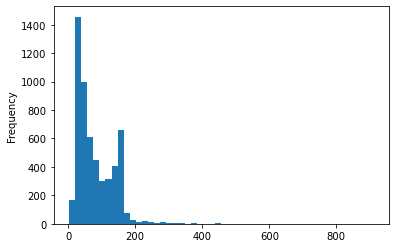

In [35]:
messages['length'].plot.hist(bins=50,by='label')

In [41]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [51]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BC2FB732E0>,
      dtype=object)

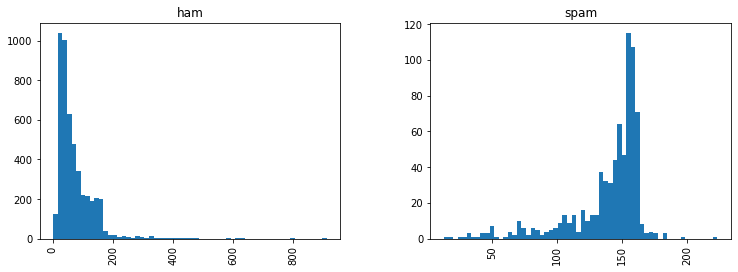

In [54]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

# Converting messages into a sequence of numbers

In [55]:
import string

In [91]:
mess='Sample Message! : ?, notice it has punctuation'

In [92]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
nopunc =[c for c in mess if c not in string.punctuation]

In [94]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 ' ',
 ' ',
 'n',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [95]:
from nltk.corpus import stopwords

In [96]:
stopwords.words('english')# Common words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [97]:
nopunc=''.join(nopunc)#joining elements of a list together

In [98]:
nopunc

'Sample Message   notice it has punctuation'

In [99]:
'+'.join(nopunc)

'S+a+m+p+l+e+ +M+e+s+s+a+g+e+ + + +n+o+t+i+c+e+ +i+t+ +h+a+s+ +p+u+n+c+t+u+a+t+i+o+n'

In [100]:
nopunc.split()

['Sample', 'Message', 'notice', 'it', 'has', 'punctuation']

In [101]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [102]:
clean_mess

['Sample', 'Message', 'notice', 'punctuation']

In [120]:
def text_process(mess):
    #Remove punctuation
    #Remove stock words
    #Return text of clean list words
    
    punc_rem = [word for word in mess if word not in string.punctuation]
    punc_rem = ''.join(punc_rem)
    
    stock_rem = punc_rem.split()
    stock_rem = [word for word in stock_rem if word.lower() not in stopwords.words('english')]
    return stock_rem
    

In [121]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [122]:
test=messages['message'].apply(text_process)

In [124]:
test.head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [125]:
from sklearn.feature_extraction.text import CountVectorizer

In [128]:
bow_transformer= CountVectorizer(analyzer=text_process).fit(messages['message']) #Bag of words

In [131]:
print(len(bow_transformer.vocabulary_))

11425


In [132]:
mess4=messages['message'][3]

In [133]:
mess4

'U dun say so early hor... U c already then say...'

In [134]:
bow4=bow_transformer.transform([mess4])

In [136]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [139]:
print(bow4.shape)

(1, 11425)


In [145]:
bow_transformer.get_feature_names()[9554]#'say appears twice'

'say'

In [146]:
bow_transformer.get_feature_names()[5261]

'c'

In [149]:
messages_bow=bow_transformer.transform(messages['message'])

In [151]:
print(messages_bow)

  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1
  (1, 2451)	1
  (1, 3064)	1
  (1, 7701)	1
  (1, 8590)	1
  (1, 10698)	1
  (1, 11072)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5568, 6691)	1
  (5568, 6882)	1
  (5568, 7159)	1
  (5568, 11418)	1
  (5569, 3228)	1
  (5569, 3721)	1
  (5569, 8252)	1
  (5569, 10199)	1
  (5570, 4508)	1
  (5570, 5055)	1
  (5570, 5251)	1
  (5570, 6282)	1
  (5570, 6699)	1
  (5570, 6799)	1
  (5570, 6984)	1
  (5570, 7287)	1
  (5570, 7394)	1
  (5570, 7800)	1
  (5570, 8420)	1
  (5570, 9915)	1
  (5570, 10787)	1
  (5570, 11006)	1
  (5571, 3431)	1
  (5571, 8348)	1
  (5571, 10648)	1


In [152]:
print('Shape of matrix', messages_bow.shape)

Shape of matrix (5572, 11425)


In [153]:
messages_bow.nnz

50548

In [154]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


# Inverse Document Frequency

In [155]:
from sklearn.feature_extraction.text import TfidfTransformer

In [158]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [159]:
tfidf4 = tfidf_transformer.transform(bow4)

In [161]:
print(tfidf4)# TFIDF- Term Frequency inverse document frequency

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [175]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [176]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [202]:
from sklearn.naive_bayes import MultinomialNB

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
spam_detect_model= MultinomialNB().fit(messages_tfidf,messages['label'])

In [179]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [180]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [182]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [183]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.33)

In [189]:
msg_train

3967         I was just callin to say hi. Take care bruv!
1075              Aight ill get on fb in a couple minutes
5373         K I'll head out in a few mins, see you there
4454                           Or I guess  &lt;#&gt;  min
90      Yeah do! Don‘t stand to close tho- you‘ll catc...
                              ...                        
982     Reckon need to be in town by eightish to walk ...
2833                  Its normally hot mail. Com you see!
396     From here after The performance award is calcu...
5249        K I'm leaving soon, be there a little after 9
5291      Xy trying smth now. U eat already? We havent...
Name: message, Length: 3733, dtype: object

In [192]:
from sklearn.pipeline import Pipeline

In [205]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [206]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002BC32E62040>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [207]:
predictions=pipeline.predict(msg_test)

In [208]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [209]:
print(classification_report(label_test,predictions))
print('\n')
print(confusion_matrix(label_test,predictions))
print('\n')
print(accuracy_score(label_test,predictions))
print('\n')

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1598
        spam       1.00      0.76      0.87       241

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.97      1839



[[1598    0]
 [  57  184]]


0.9690048939641109




In [210]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

pipeline.fit(msg_train,label_train)

predictions=pipeline.predict(msg_test)

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(classification_report(label_test,predictions))
print('\n')
print(confusion_matrix(label_test,predictions))
print('\n')
print(accuracy_score(label_test,predictions))
print('\n')

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1598
        spam       1.00      0.70      0.82       241

    accuracy                           0.96      1839
   macro avg       0.98      0.85      0.90      1839
weighted avg       0.96      0.96      0.96      1839



[[1598    0]
 [  73  168]]


0.9603045133224578


